In [ ]:
import pandas as pd
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv('E:/datasets/fake-news-dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
df = df[['text', 'label']]

In [4]:
df = df.dropna(subset=['text'])

In [ ]:
def advanced_cleaning(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = text.lower().strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens_lemmatized)


df['News'] = df['text'].apply(advanced_cleaning)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['News'])
sequences = tokenizer.texts_to_sequences(df['News'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
with open('E:/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
df.drop('text', axis = 1, inplace = True)

In [9]:
df

,label,News
0,1,comment expected barack obama member fyf911 fu...
1,1,post vote hillary already
2,1,demonstrator gathered last night exercising co...
3,0,dozen politically active pastor came private d...
4,1,rs28 sarmat missile dubbed satan 2 replace ss1...
...,...,...
72129,0,washington reuters hacker believed working rus...
72130,1,know fantasyland republican never questioned c...
72131,0,migrant refuse leave train refugee camp hungar...
72132,0,mexico city reuters donald trump combative sty...


In [24]:
df[ df['label'] == 1 ]

,label,News
0,1,comment expected barack obama member fyf911 fukyoflag blacklivesmatter movement called lynching hanging white people cop encouraged others radio show tuesday night turn tide kill white people cop send message killing black people americaone fyoflag organizer called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot fyf911 lolatwhitefear twitter page 953 pm show urging supporter call fyf911 tonight continue dismantle illusion white snapshot twitter radio call invite fyf911the radio show aired 1000 pm eastern standard timeduring show caller clearly call lynching killing white peoplea 239 minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threat result interrupting fyf911 conference callsan unidentified black man said mother fkers start fing like u bunch niers takin one u roll said cause already roll gang anyway six seven black mother fckers see white person lynch as let turn table conspired cop started losing people state emergency speculated one two thing would happen bigass r war niers going start backin already getting killed fk got lose sunshine could heard saying yep true fking true said need turn table kid getting shot somebody need become sacrifice sidehe said everybody st whatever like say everybody different position war continued give fk anyway said might well utilized st turn table ners said way start lookin like havin many casualty causality side instead killing black people black life matter mother fkers got make matter find mother fker alone snap as fin hang damn tree take picture send mother fkers need one example people start watchin turn table st said said start trickledown effect said one white person hung flathanging start trickledown effect continued black people good starting trend said get upperhand another black man spoke saying needed kill cop killing u first black male said best method right breitbart texas previously reported sunshine upset racist white people infiltrated disrupted one conference call subsequently released phone number one infiltrator veteran immediately started receiving threatening callsone fyoflag movement supporter allegedly told veteran infiltrated publicly posted conference call going rape gut pregnant wife fing piece sht unborn creature hung tree breitbart texas previously encountered sunshine sandra bland protest waller county jail texas said white people killed told journalist photographer see nappyass hair head mean one militant negro said protest redneck motherfkers murdered sandra bland nappy hair like fyf911 black radical say holding imperial power actually responsible terrorist attack september 11th accountable day reported breitbart texas several website twitter handle movement palmetto star describes one head organizer said youtube video supporter burning symbol illusion superiority false white supremacy like american flag british flag police uniform ku klux klan hoodssierra mcgrone nocturnus libertus posted help young afrikan clean rag oppression posted two photo one appears photo black man wiping naked butt american flagfor entire story breitbart news
1,1,post vote hillary already
2,1,demonstrator gathered last night exercising constitutional protected right peaceful protest order raise issue create change loretta lynch aka eric holder skirt
4,1,rs28 sarmat missile dubbed satan 2 replace ss18 fly 43 mile 7km per sec range 6213 mile 10000km weapon perceived part increasingly aggressive russia could deliver warhead 40 megaton 2000 time powerful atom bomb dropped hiroshima nagasaki 1945 libby plummer gareth davie russia unveiled chilling picture largest ever nuclear missile capable destroying area size france rs28 sarmat missile dubbed satan 2 nato top speed 43 mile 7km per second designed outfox antimissile shield system new sarmat missile could deliver warhead 40 megaton 2000 time powerful atom bomb dropped hiroshima nagasaki 1945 scroll video russian presi

In [23]:
df[ df['label'] == 0 ]

label  \
3          0   
11         0   
12         0   
14         0   
15         0   
...      ...   
72124      0   
72126      0   
72129      0   
72131      0   
72132      0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [22]:
pd.set_option('display.max_colwidth', None)

In [ ]:
labels = np.array(df['label'])
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
vocab_size = 10000
embedding_dim = 128
max_length = 100

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length = max_length), 
    LSTM(128, return_sequences=False), 
    Dropout(0.5),  
    Dense(64, activation='relu'), 
    Dropout(0.5),  
    Dense(1, activation='sigmoid') 
])

C:\Users\mariam walid\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.build(input_shape=(None, max_length))  

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,419,905 (5.42 MB)

 Trainable params: 1,419,905 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,        
    restore_best_weights=True  
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping] 
)

loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/10
1803/1803 - 85s - 47ms/step - accuracy: 0.7556 - loss: 0.5439 - val_accuracy: 0.6247 - val_loss: 0.6132
Epoch 2/10
1803/1803 - 80s - 44ms/step - accuracy: 0.8277 - loss: 0.4117 - val_accuracy: 0.8992 - val_loss: 0.2697
Epoch 3/10
1803/1803 - 82s - 45ms/step - accuracy: 0.9230 - loss: 0.2124 - val_accuracy: 0.9362 - val_loss: 0.1689
Epoch 4/10
1803/1803 - 80s - 44ms/step - accuracy: 0.9580 - loss: 0.1255 - val_accuracy: 0.9420 - val_loss: 0.1594
Epoch 5/10
1803/1803 - 80s - 44ms/step - accuracy: 0.9757 - loss: 0.0753 - val_accuracy: 0.9441 - val_loss: 0.1555
Epoch 6/10
1803/1803 - 82s - 45ms/step - accuracy: 0.9879 - loss: 0.0405 - val_accuracy: 0.9437 - val_loss: 0.1854
Epoch 7/10
1803/1803 - 80s - 45ms/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9456 - val_loss: 0.2924
Epoch 8/10
1803/1803 - 80s - 44ms/step - accuracy: 0.9946 - loss: 0.0183 - val_accuracy: 0.9452 - val_loss: 0.2615
451/451 - 7s - 16ms/step - accuracy: 0.9441 - loss: 0.1555
Test Accuracy: 0.94


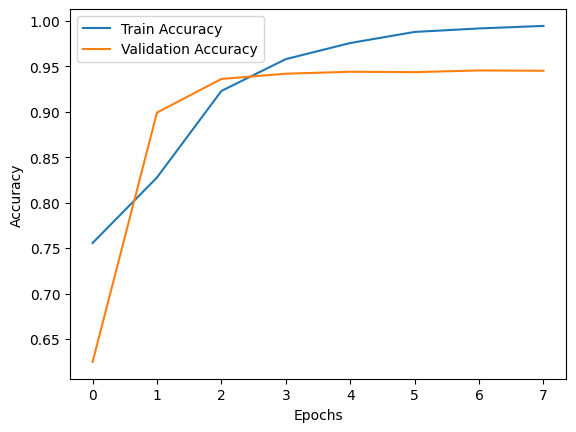

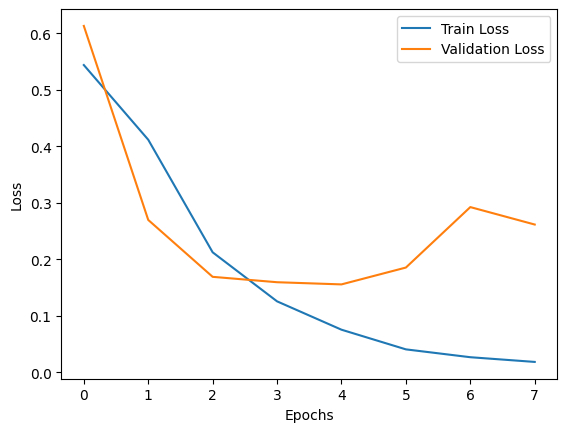

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step


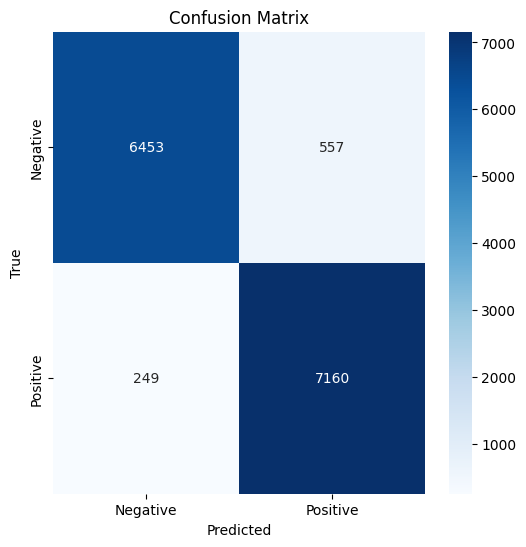

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.96      0.92      0.94      7010
    Positive       0.93      0.97      0.95      7409

    accuracy                           0.94     14419
   macro avg       0.95      0.94      0.94     14419
weighted avg       0.94      0.94      0.94     14419



In [ ]:
model.save('fake_news_model.h5')
print("Model saved as 'fake_news_model.h5'")

Model saved as 'fake_news_model.h5'


In [18]:
filename = 'E:/fake_news_model.sav'
pickle.dump(model, open(filename, 'wb'))